In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("./weights/yolov8n.pt")

In [ ]:
results = model.predict(source="./samples")

In [23]:
import cv2
img = cv2.imread("./samples/cars.jpg")
results = model(img, iou=0.6, verbose=False)[0]

results.boxes.xyxy


tensor([[ 674.,  435.,  938.,  645.],
        [ 819.,  628., 1138.,  880.],
        [1267.,  500., 1574.,  742.],
        [ 301.,  279.,  420.,  364.],
        [ 881.,  971., 1254., 1075.],
        [ 613.,  366.,  827.,  556.],
        [ 518.,  296.,  707.,  467.],
        [ 945.,  306., 1162.,  488.],
        [ 131.,  205.,  262.,  366.],
        [ 433.,  322.,  516.,  361.]], device='cuda:0')


0: 384x640 9 cars, 1 truck, 79.1ms
Speed: 1.0ms pre-process, 79.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


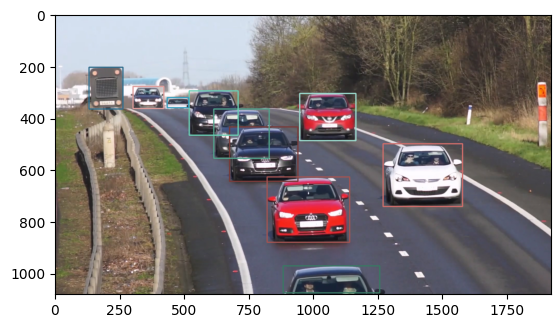

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread("./samples/cars.jpg")
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

results = model(img, iou=0.6, verbose=True)[0]

for i,result in enumerate(results):
    color = colors[i % len(colors)]
    color = [i*255 for i in color]
    bbox = result.boxes.xyxy.cpu().squeeze()
    cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, 4)
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("./weights/yolov8m.pt")

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
target_img_path = "./data/number_recog_capture.jpg"
target_img = cv2.imread(target_img_path)
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

candidate = model(target_img, verbose=False)[0]

In [22]:
cmap = plt.get_cmap('tab20b')
colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

In [27]:
candidate.boxes.xywh

tensor([[1348.50000,  472.50000, 1139.00000,  941.00000],
        [ 200.50000,  619.50000,  399.00000,  901.00000],
        [  37.00000,  979.50000,   74.00000,  195.00000]], device='cuda:0')

In [30]:
from utils import util

In [31]:
target_cls = ['car', 'truck']
class_names = util.read_class_name("./utils/coco.names")
max_candidate = -1
max_size = 0
for i, result in enumerate(candidate):
    _,_,w,h = result.boxes.xywh.cpu().numpy().squeeze()
    
    class_name = class_names[int(result.boxes.cls)]
    
    if class_name in target_cls and w*h > max_size:
        max_size = w*h
        max_candidate = i

print(max_candidate)

0


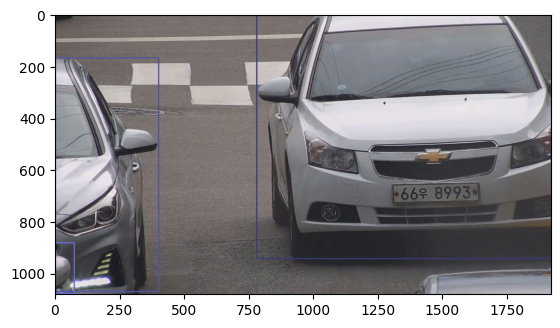

In [23]:
for i,result in enumerate(candidate):
    color = colors[i % len(colors)]
    color = [i*255 for i in color]
    bbox = result.boxes.xyxy.cpu().squeeze()
    cv2.rectangle(target_img, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, 4)
    
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(target_img)

In [2]:
from utils import util

util.frame2time(5, 15)
util.frame2time(21, 15)

'0:0:1.3'

In [1]:
weights = ["reid/vehicleID_dynamic.onnx", "reid/veriwild_dynamic.onnx", "reid/VeRi_dynamic.onnx", ]
weight_name = ["vehicleID", "veriwild", "VeRi"]

for i in range(len(weights)):
    for j in range(len(weights)):
        !python object_two_tracker.py --sort_weights {weights[i]} --reid_weights {weights[j]} --output ./output/s{weight_name[i]}_r{weight_name[j]}.mp4

6.667548500881834 11.111992945326278



Frame #:   0%|          | 0/2268 [00:00<?, ?it/s]Ultralytics YOLOv8.0.20  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

Frame #: 100%|██████████| 2268/2268 [07:57<00:00,  4.75it/s]
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


6.667548500881834 11.111992945326278



Frame #:   0%|          | 0/2268 [00:00<?, ?it/s]Ultralytics YOLOv8.0.20  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

Frame #: 100%|██████████| 2268/2268 [07:55<00:00,  4.77it/s]
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


6.667548500881834 11.111992945326278


2 0 2 3 - 0 2 - 2 0   1 9 : 1 3 : 0 9 . 7 1 6 6 1 7 6   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 0   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   S o m e   n o d e s   w e r e   n o t   a s s i g n e d   t o   t h e   p r e f e r r e d   e x e c u t i o n   p r o v i d e r s   w h i c h   m a y   o r   m a y   n o t   h a v e   a n   n e g a t i v e   i m p a c t   o n   p e r f o r m a n c e .   e . g .   O R T   e x p l i c i t l y   a s s i g n s   s h a p e   r e l a t e d   o p s   t o   C P U   t o   i m p r o v e   p e r f . 
 2 0 2 3 - 0 2 - 2 0   1 9 : 1 3 : 0 9 . 7 1 7 1 5 5 7   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 2   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   R e r u n n i n g   w i t h   v e r b o s e   o u t p u t   o n   a   n o n - m i n i m a l   b u i l d   w i l l   s h o w   n o d e   a s s i g n m e n t s 

6.667548500881834 11.111992945326278



Frame #:   0%|          | 0/2268 [00:00<?, ?it/s]Ultralytics YOLOv8.0.20  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

Frame #: 100%|██████████| 2268/2268 [08:02<00:00,  4.70it/s]
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'

Frame #:   0%|          | 0/2268 [00:00<?, ?it/s]Ultralytics YOLOv8.0.20  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

Frame #: 100%|██████████| 2268/2268 [07:51<00:00,  4.81it/s]
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


6.667548500881834 11.111992945326278
6.667548500881834 11.111992945326278


2 0 2 3 - 0 2 - 2 0   1 9 : 3 7 : 2 4 . 7 6 3 6 7 4 7   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 0   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   S o m e   n o d e s   w e r e   n o t   a s s i g n e d   t o   t h e   p r e f e r r e d   e x e c u t i o n   p r o v i d e r s   w h i c h   m a y   o r   m a y   n o t   h a v e   a n   n e g a t i v e   i m p a c t   o n   p e r f o r m a n c e .   e . g .   O R T   e x p l i c i t l y   a s s i g n s   s h a p e   r e l a t e d   o p s   t o   C P U   t o   i m p r o v e   p e r f . 
 2 0 2 3 - 0 2 - 2 0   1 9 : 3 7 : 2 4 . 7 6 4 2 0 5 6   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 2   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   R e r u n n i n g   w i t h   v e r b o s e   o u t p u t   o n   a   n o n - m i n i m a l   b u i l d   w i l l   s h o w   n o d e   a s s i g n m e n t s 

6.667548500881834 11.111992945326278


2 0 2 3 - 0 2 - 2 0   1 9 : 4 5 : 2 2 . 7 0 0 3 2 9 0   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 0   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   S o m e   n o d e s   w e r e   n o t   a s s i g n e d   t o   t h e   p r e f e r r e d   e x e c u t i o n   p r o v i d e r s   w h i c h   m a y   o r   m a y   n o t   h a v e   a n   n e g a t i v e   i m p a c t   o n   p e r f o r m a n c e .   e . g .   O R T   e x p l i c i t l y   a s s i g n s   s h a p e   r e l a t e d   o p s   t o   C P U   t o   i m p r o v e   p e r f . 
 2 0 2 3 - 0 2 - 2 0   1 9 : 4 5 : 2 2 . 7 0 0 8 1 2 2   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 2   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   R e r u n n i n g   w i t h   v e r b o s e   o u t p u t   o n   a   n o n - m i n i m a l   b u i l d   w i l l   s h o w   n o d e   a s s i g n m e n t s 

6.667548500881834 11.111992945326278


2 0 2 3 - 0 2 - 2 0   1 9 : 5 3 : 4 6 . 0 5 3 5 4 5 8   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 0   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   S o m e   n o d e s   w e r e   n o t   a s s i g n e d   t o   t h e   p r e f e r r e d   e x e c u t i o n   p r o v i d e r s   w h i c h   m a y   o r   m a y   n o t   h a v e   a n   n e g a t i v e   i m p a c t   o n   p e r f o r m a n c e .   e . g .   O R T   e x p l i c i t l y   a s s i g n s   s h a p e   r e l a t e d   o p s   t o   C P U   t o   i m p r o v e   p e r f . 
 2 0 2 3 - 0 2 - 2 0   1 9 : 5 3 : 4 6 . 0 5 4 1 3 8 9   [ W : o n n x r u n t i m e : ,   s e s s i o n _ s t a t e . c c : 1 0 3 2   o n n x r u n t i m e : : V e r i f y E a c h N o d e I s A s s i g n e d T o A n E p ]   R e r u n n i n g   w i t h   v e r b o s e   o u t p u t   o n   a   n o n - m i n i m a l   b u i l d   w i l l   s h o w   n o d e   a s s i g n m e n t s 

6.667548500881834 11.111992945326278
